In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
%matplotlib inline

For this notebook we want to create some basic data. I base myself here on Bishop, "Pattern Recognition and Machine Learning", chap 3 and create 100 datasets of 10 points each from $\sin 2\pi x$.

In [2]:
def data_func(x):
    return np.sin(2*np.pi*x)

def create_datasets(Nsets=100, Npoints=10):
    """Create Nsets datasets with Npoints points from sin 2pi x"""
    
    datasets = []
    for i in range(Nsets):
        x_r = np.random.uniform(0, 1, size=Npoints)
        y_r = data_func(x_r)
        datasets.append((x_r, y_r))
        
    return datasets

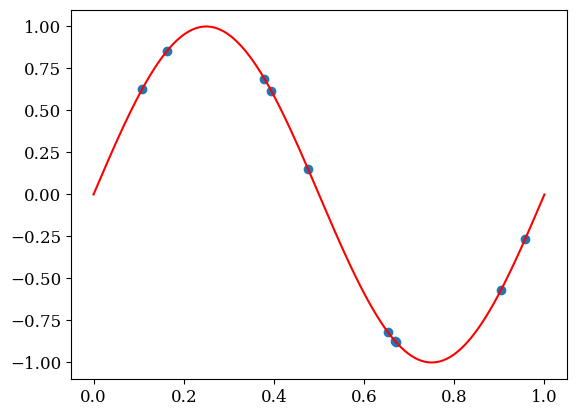

In [3]:
datasets = create_datasets()
x, y = datasets[20]
xp = np.linspace(0, 1, 500)
plt.scatter(x, y)
plt.plot(xp, data_func(xp), color='red')

# Carry out Gaussian basis regression

In standard linear regression, we fit a function
$$f(x; {\theta_i}) = \sum_i \theta_i x$$
to our data. In basis function regression we transform our data with a basis function.

$$g(x; {\theta_i}) = \sum_i \phi(\theta_i) x$$

Thus to run this regression, we first need to transform our data. Here we will do this using a Gaussian.

In [4]:
def gaussian_basis(x, mu, sigma):
    """A simple Gaussian basis function"""
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)


To use the Gaussian basis, we need to calculate it a various positions along the x-axis

In [5]:
centers = np.linspace(0, 1, 10)
widths = 0.05

Now we have all ingredients required to do a linear regression fit. We first try it for one dataset, before automatise this for multiple sets.

In [6]:
X = gaussian_basis(x[:, np.newaxis], centers, widths)
X.shape

(10, 10)

In [7]:
clf = LinearRegression(fit_intercept=True)
clf.fit(X, y)
fit = clf.predict(gaussian_basis(xp[:, None], centers, widths))

In [8]:
clf.coef_

array([-0.09962347,  0.09308449,  0.60950506,  0.31413845, -0.04603898,
       -1.11863532, -1.1059275 , -1.9461887 , -0.93830548, -0.56590894])

In [9]:
clf.intercept_

0.4993687524849333

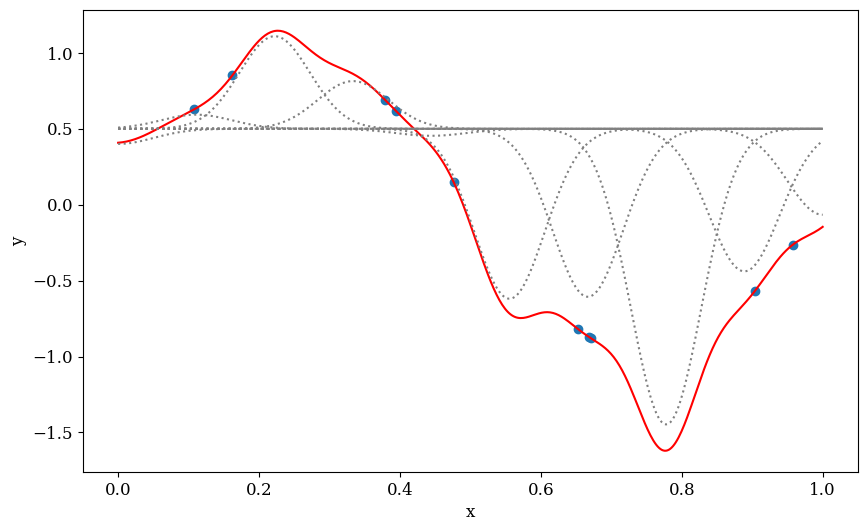

In [10]:
plt.scatter(x, y)
plt.plot(xp, fit, color='red')
for ic, c in enumerate(centers):
    plt.plot(xp, clf.coef_[ic]*gaussian_basis(xp, c, widths)+clf.intercept_, color='gray', ls='dotted')
plt.xlabel('x')
plt.ylabel('y')
fig = plt.gcf()
fig.set_size_inches(10, 6)

### Running multiple models.

To run many models, we stack the results in a numpy array

In [11]:
def fit_models(datasets, n_centers=10, widths=0.05, lasso=False, ridge=False, alpha=0.04):
    """Fit all data in datasets"""
    
    centers = np.linspace(0, 1, n_centers)
    n_plot = 500
    xp = np.linspace(0, 1, n_plot)
    n_datasets = len(datasets)
    
    predicted = np.zeros((n_datasets, n_plot))
    for i, dataset in enumerate(datasets):
        x, y = dataset
        X = gaussian_basis(x[:, np.newaxis], centers, widths)
        
        clf = LinearRegression(fit_intercept=True)
        clf.fit(X, y)
        fit = clf.predict(gaussian_basis(xp[:, None], centers, widths))
        
        predicted[i, :] = fit
        
    return xp, predicted

In [12]:
xp, pred = fit_models(datasets, n_centers=25)

In [13]:
pred.shape

(100, 500)

(-2.0, 2.0)

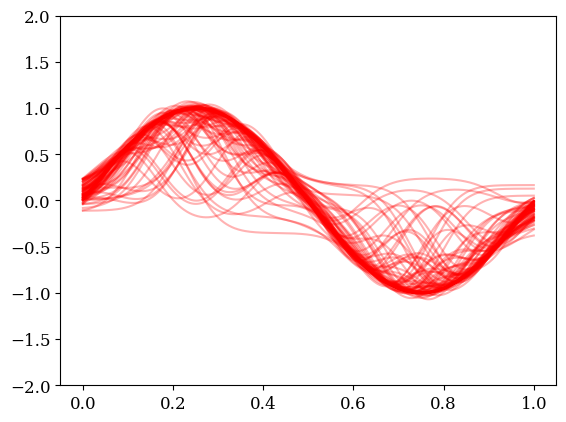

In [14]:
for i in range(100):
    plt.plot(xp, pred[i, :], color='red', alpha=0.3)
plt.ylim(-2, 2)

## Bagging of the result

The bagging estimate is simply the average at each point

In [15]:
pred_bag = np.mean(pred, axis=0)

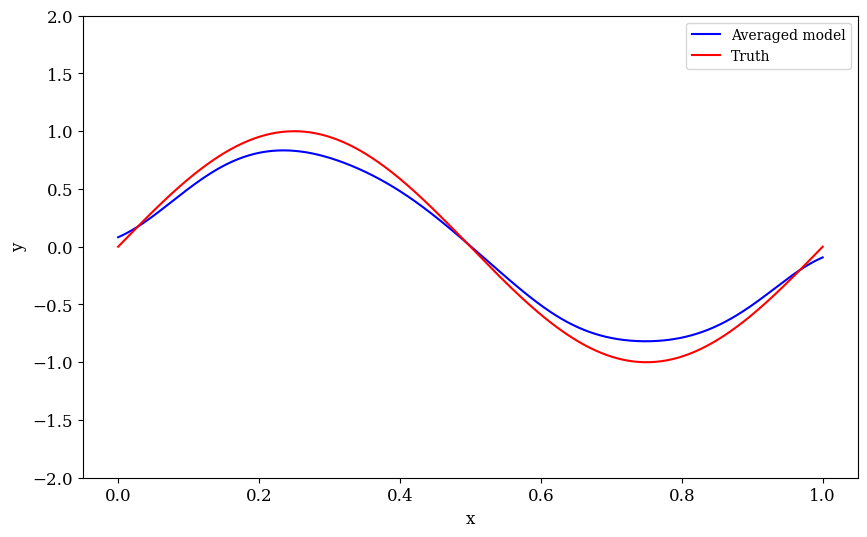

In [16]:
plt.plot(xp, pred_bag, color='blue', label='Averaged model')
#plt.plot(xp, pred[5, :], color='gray')
#plt.plot(xp, pred[15, :], color='gray')
#plt.plot(xp, pred[25, :], color='gray')
plt.plot(xp, data_func(xp), color='red', label='Truth')
plt.ylim(-2, 2)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Create some plots for lecture.



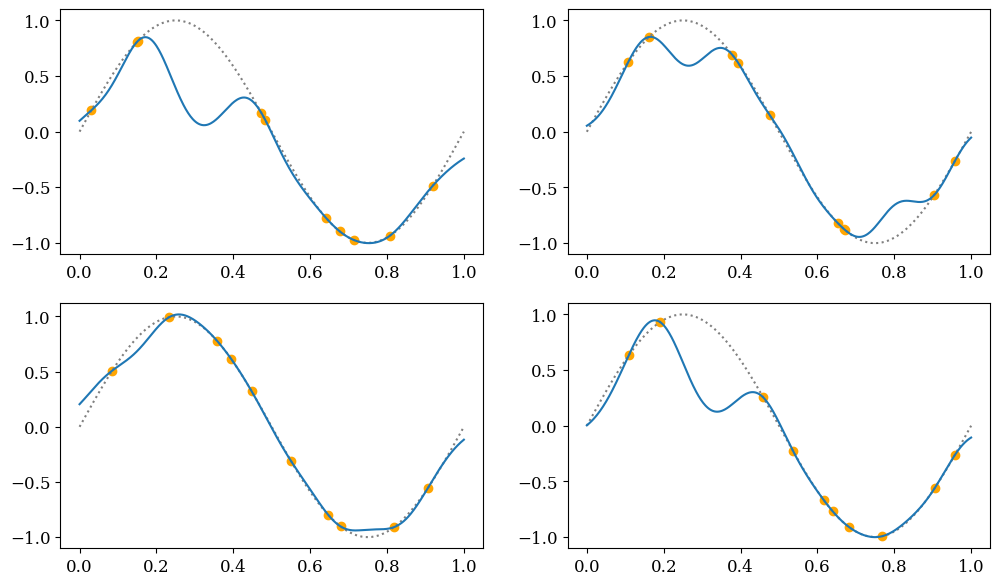

In [17]:
todo = [10, 20, 30, 40]
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
count = 0
for ix in range(2):
    for iy in range(2):
        x, y = datasets[todo[count]]
        axes[ix, iy].plot(xp, data_func(xp), ls='dotted', color='gray')
        axes[ix, iy].plot(xp, pred[todo[count], :])
        axes[ix, iy].scatter(x, y, color='orange')
        count=count+1